### shubham birari (ml16)

Q2

Based on question 1

create the database 

connect python with any database

create functions to connect database

function to accept order from customer

function to generate bill

function to download bill

In [24]:
import mysql.connector

# Connect to the MySQL server
mydb = mysql.connector.connect(
    host="localhost",
    user="root",
    passwd="shubham098",
    database="billdatabase"  
)

# Create a table for menu items if it doesn't exist
cursor = mydb.cursor()
cursor.execute("""
CREATE TABLE IF NOT EXISTS menu (
    id INT AUTO_INCREMENT PRIMARY KEY,
    item_name VARCHAR(255),
    price FLOAT
)
""")
mydb.commit()

# Create a table for bills if it doesn't exist
cursor.execute("""
CREATE TABLE IF NOT EXISTS bills (
    id INT AUTO_INCREMENT PRIMARY KEY,
    customer_name VARCHAR(255),
    table_number INT,
    total_bill FLOAT
);
""")
mydb.commit()

# Define a function to get the menu details from the user
def get_menu_details():
    menu = {}
    while True:
        item = input("Enter item name or 'done' to finish: ")
        if item.lower() == 'done':
            break
        price = float(input("Enter item price: "))
        menu[item] = price
    return menu

# Define the function to save the menu and bill details to the database
def save_menu_to_database():
    # Get the menu details from the user
    menu = get_menu_details()

    # Get the customer name and table number from the user
    name = input("Enter customer name: ")
    table_number = int(input("Enter table number: "))

    # Calculate the total bill
    total_bill = sum(menu.values())

    # Save the menu and total bill to the database
    cursor = mydb.cursor()
    for item, price in menu.items():
        query = "INSERT INTO menu (item_name, price) VALUES (%s, %s)"
        values = (item, price)
        cursor.execute(query, values)
    query = "INSERT INTO bills (customer_name, table_number, total_bill) VALUES (%s, %s, %s)"
    values = (name, table_number, total_bill)
    cursor.execute(query, values)
    mydb.commit()

# Call the function to get the menu details and save them to the database
save_menu_to_database()


Enter item name or 'done' to finish: mango
Enter item price: 100
Enter item name or 'done' to finish: apple
Enter item price: 200
Enter item name or 'done' to finish: grapes
Enter item price: 50
Enter item name or 'done' to finish: done
Enter customer name: vicky
Enter table number: 4


In [ ]:
# Fetch all bill details from the database
cursor = mydb.cursor()
cursor.execute("SELECT * FROM bills")
bills = cursor.fetchall()


In [26]:
# Print the bill details
for bill in bills:
    print(f"Bill ID: {bill[0]}, Customer Name: {bill[1]}, Table Number: {bill[2]}, Total Bill: {bill[3]}")

Bill ID: 1, Customer Name: shubbh, Table Number: 1, Total Bill: 60.0
Bill ID: 2, Customer Name: ram, Table Number: 3, Total Bill: 60.0
Bill ID: 3, Customer Name: john, Table Number: 3, Total Bill: 95.0
Bill ID: 4, Customer Name: vicky, Table Number: 4, Total Bill: 350.0


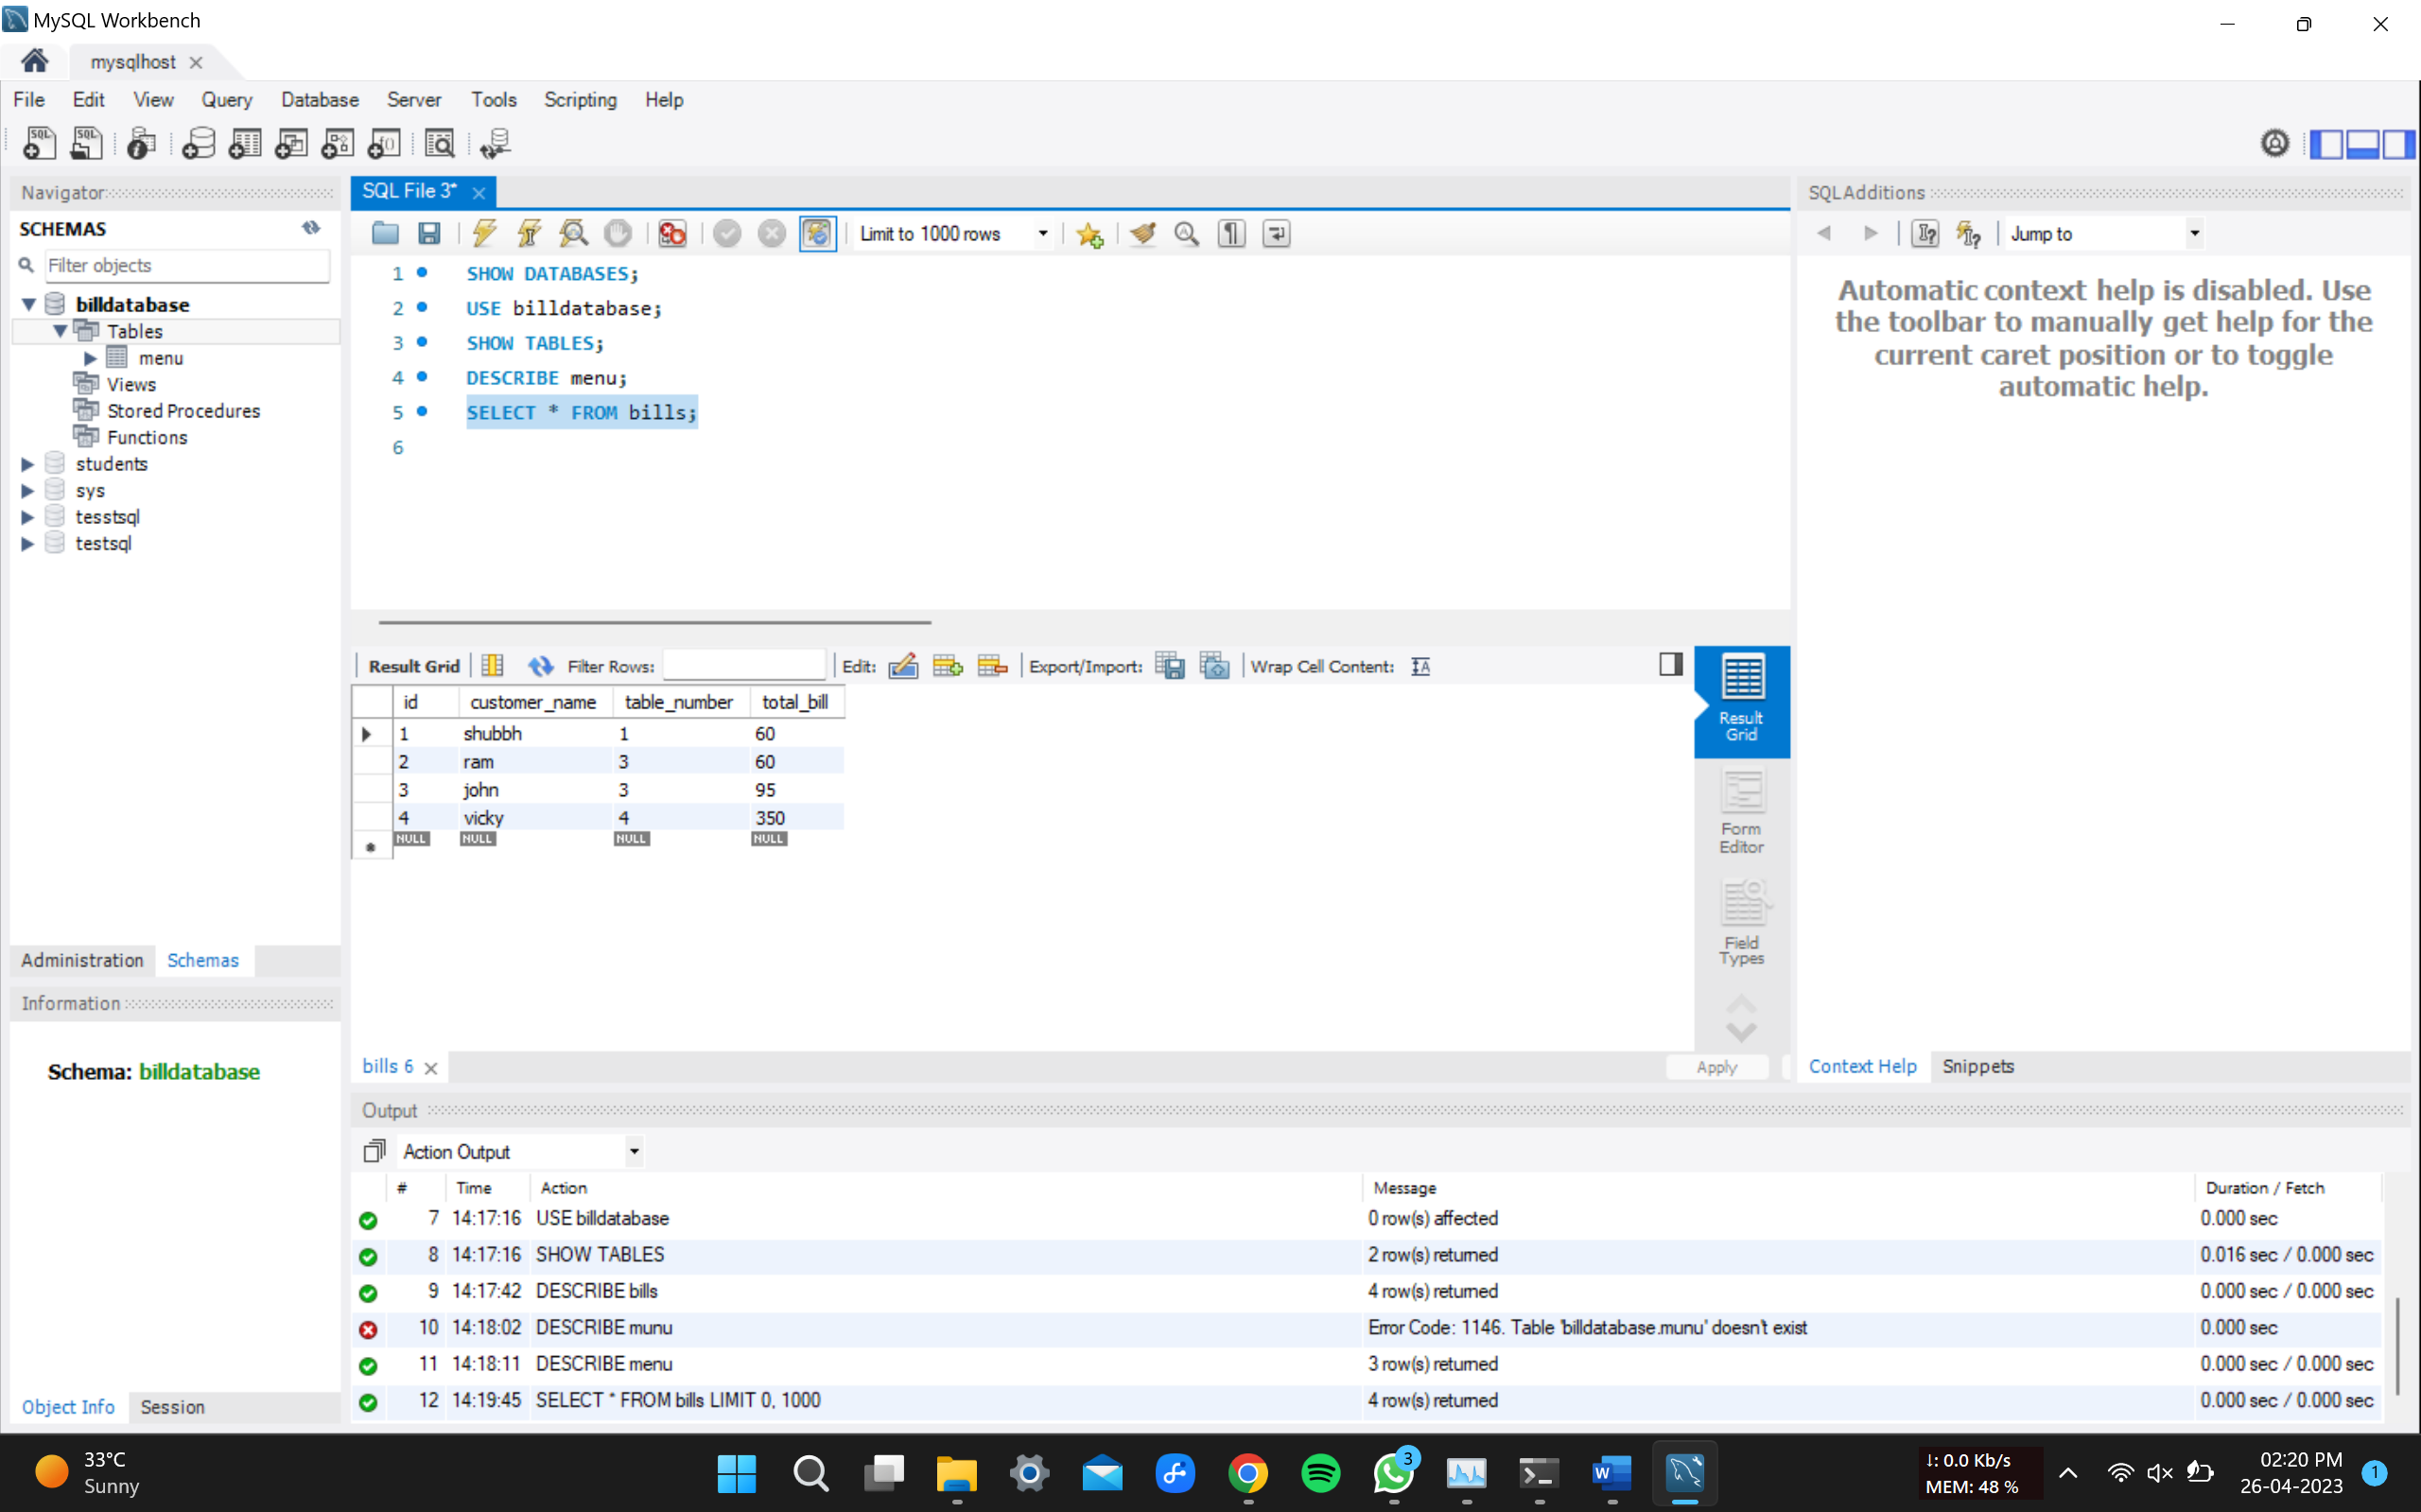